# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
# opening the training dataset
train_dataset = get_dataset("/home/workspace/data/train/*.tfrecord")
# opening the validation dataset
val_dataset = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


In [3]:
train_dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

In [4]:
trial = [i for i in train_dataset.take(1)]


trial[0]["groundtruth_classes"]

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [5]:
trial[0].keys()

dict_keys(['image', 'source_id', 'key', 'filename', 'groundtruth_image_confidences', 'groundtruth_verified_neg_classes', 'groundtruth_not_exhaustive_classes', 'groundtruth_boxes', 'groundtruth_area', 'groundtruth_is_crowd', 'groundtruth_difficult', 'groundtruth_group_of', 'groundtruth_weights', 'groundtruth_classes', 'groundtruth_image_classes', 'original_image_spatial_shape'])

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [6]:
def display_images(batch):
    # create color map for vehicles, pedestrians and cyclist classes
    color_map = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    # get the image shape 
    img_shape = batch["image"].numpy().shape
    # get the boxes and correspondance classes
    img_boxes = batch["groundtruth_boxes"].numpy()
    img_classes = batch["groundtruth_classes"].numpy()
    
    # initialize a subplot
    fig, ax = plt.subplots()
    
    # draw the boxes and their classes on the image
    for img_box, img_class in  zip(img_boxes, img_classes):
        y1, x1, y2, x2 = img_box
        
        # get the width and height of the rectangle
        width = (x2 - x1) * img_shape[1]
        height = (y2 - y1) * img_shape[0] 
        # create the bounding box
        rec = patches.Rectangle((x1*img_shape[1], y1*img_shape[0]), width, height,
                             facecolor = "none", edgecolor = color_map[img_class])
        ax.add_patch(rec)
    # show the image
    plt.axis("off")
    plt.imshow(batch["image"].numpy())
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

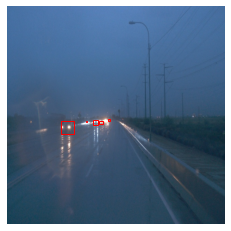

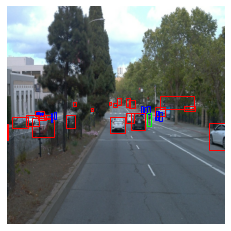

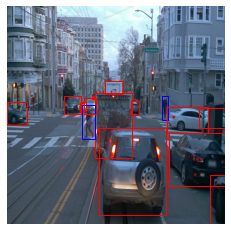

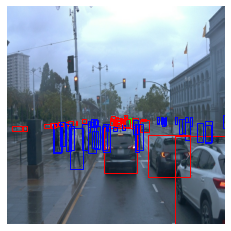

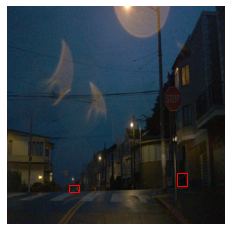

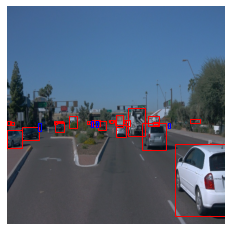

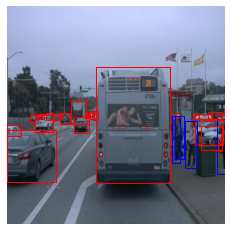

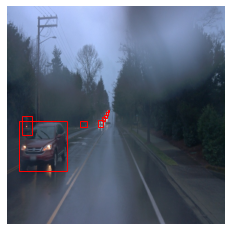

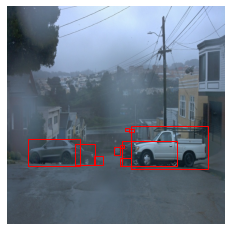

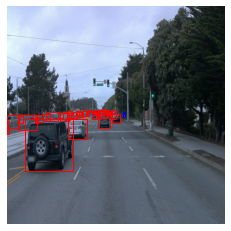

In [7]:
# Display 10 random images in dataset
# Training set 
# shuffle the dataset
train_dataset.shuffle(60)

for img_num, batch in enumerate(train_dataset.take(10)):
    display_images(batch)
    plt.savefig(fr"examples/training_examples/random_train_{img_num}.png")

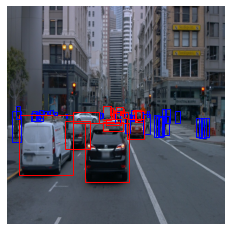

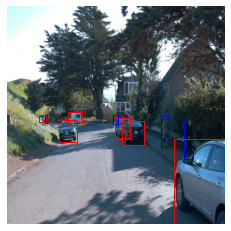

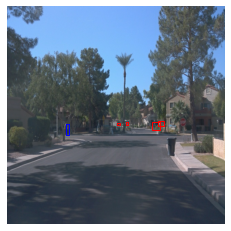

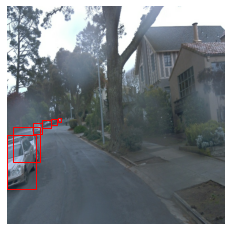

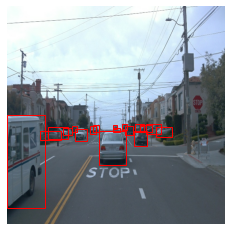

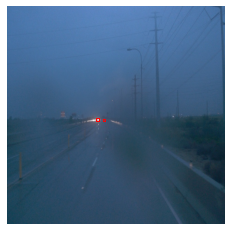

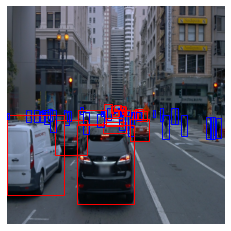

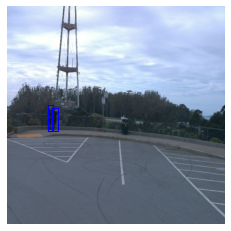

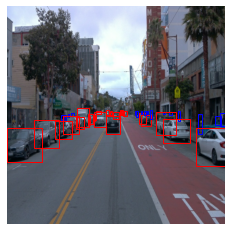

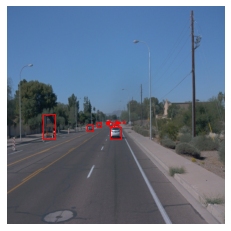

In [8]:
# validation set 
val_dataset.shuffle(50)
# randomly disply 10 ímages in validation dataset
for img_num, batch in enumerate(train_dataset.take(10)):
    display_images(batch)
    plt.savefig(fr"examples/validation_examples/random_val_{img_num}.png")

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [10]:
# data distribution among random number of images (i.e. 10000)
class_numbers = {1: 0, 2: 0, 4: 0}
for batch in train_dataset.take(10000):
    # get the class distributions among each batch
    for img_class in batch["groundtruth_classes"].numpy():
        class_numbers[img_class] += 1

print(class_numbers)

{1: 173339, 2: 48549, 4: 1224}


<BarContainer object of 3 artists>

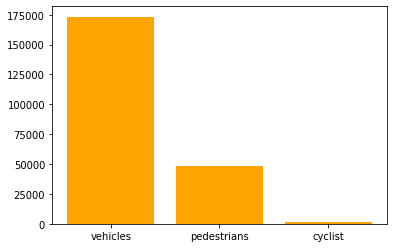

In [17]:
plt.bar(["vehicles", "pedestrians", "cyclist"], list(class_numbers.values()), color="orange")

In [ ]:
# the majority dataset contains of vehicles and the minority has cyclist content. 
# this dataset can be good when training a model to find the vehicles. 
# in order the model to be able to learn pedestrians and cyclist classes, it might be necessary to add some data augmentations for these two classes.